In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [4]:
stasiun4 = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Code\\EDA\\stasiun_1_intrp.csv')

In [5]:
stasiun4

,Unnamed: 0,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0
...,...,...,...,...,...,...,...
1822,2020-12-27,29.0,74.0,0.000000,5.7,240.0,2.0
1823,2020-12-28,28.1,77.0,0.050000,6.8,240.0,3.0
1824,2020-12-29,27.1,82.0,0.100000,6.1,240.0,3.0
1825,2020-12-30,27.0,81.0,0.300000,1.4,260.0,2.0


In [6]:
stasiun4.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
stasiun4['date'] = pd.to_datetime(stasiun4['date'])

In [7]:
def get_model(data, column):
    df_train = data[['date', column]]
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    my_model = Prophet()
    my_model.fit(df_train)
    
    return my_model

### Create Rainfall Prediction Model

In [8]:
model_RR = get_model(stasiun4, 'RR')

C:\Users\thebl\AppData\Local\Temp\ipykernel_13980\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
01:19:10 - cmdstanpy - INFO - Chain [1] start processing
01:19:10 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future_dates = model_RR.make_future_dataframe(periods=365, freq='D')
future_dates.shape[0]

2192

In [10]:
forecast = model_RR.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,14.496083,-4.945976,31.560473
1,2016-01-02,15.144074,-3.173277,32.439510
2,2016-01-03,15.348915,-1.759847,33.948800
3,2016-01-04,14.973873,-1.944296,33.977937
4,2016-01-05,16.086439,-1.798461,34.053681


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


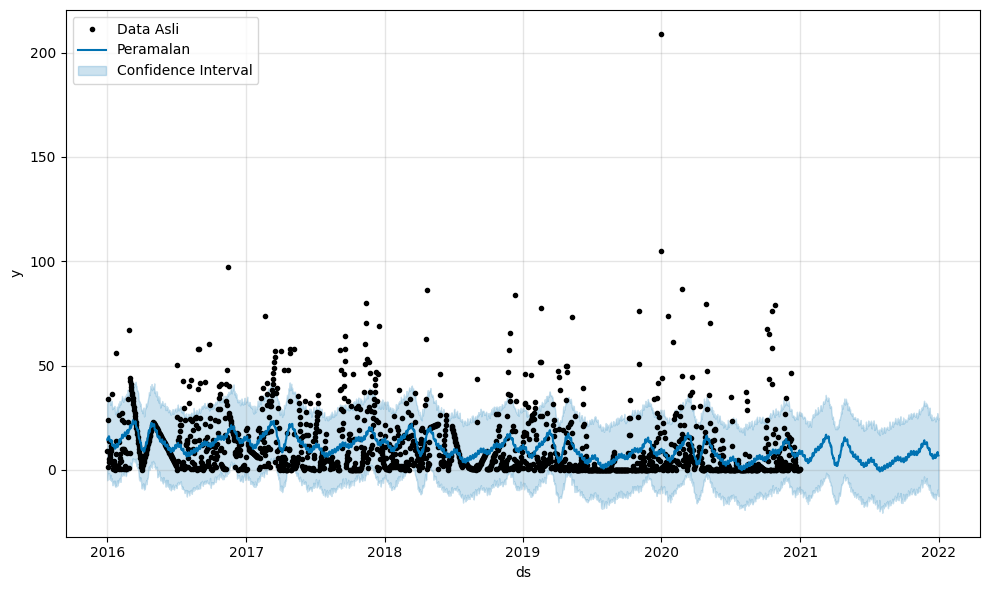

In [11]:
model_RR.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [12]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun4[column][len(stasiun4)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun4[column][len(stasiun4)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun4[column][len(stasiun4)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [13]:
triple_metric(forecast, 'RR')

Mean Absolute Error :  8.65906838818018
Mean Squared Error :  201.70223585170652
Mean Absolute Percentage Error :  1.5936622014210415


### Create Sunshine Duration Prediction Model

In [14]:
model_ss = get_model(stasiun4, 'ss')

C:\Users\thebl\AppData\Local\Temp\ipykernel_13980\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
01:19:11 - cmdstanpy - INFO - Chain [1] start processing
01:19:11 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future_dates = model_ss.make_future_dataframe(periods=365, freq='D')
forecast = model_ss.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


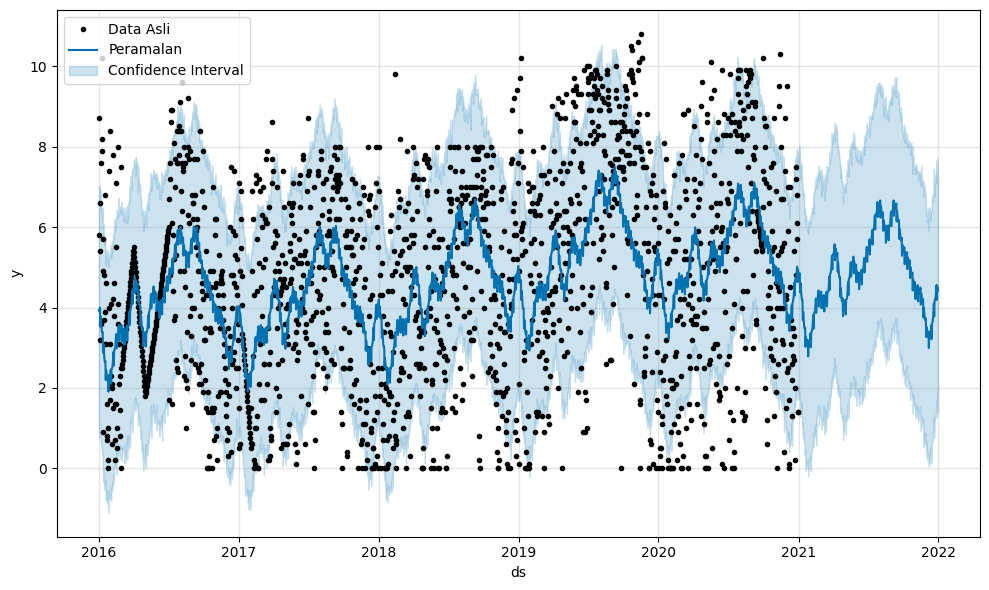

In [16]:
model_ss.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [17]:
triple_metric(forecast, 'ss')

Mean Absolute Error :  2.251154041617564
Mean Squared Error :  7.341145410100989
Mean Absolute Percentage Error :  0.4463960956618233


### Create Average Wind Direction Predict Model

In [18]:
model_ddd = get_model(stasiun4, 'ddd_x')

C:\Users\thebl\AppData\Local\Temp\ipykernel_13980\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
01:19:12 - cmdstanpy - INFO - Chain [1] start processing
01:19:12 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future_dates = model_ddd.make_future_dataframe(periods=365, freq='D')
forecast = model_ddd.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


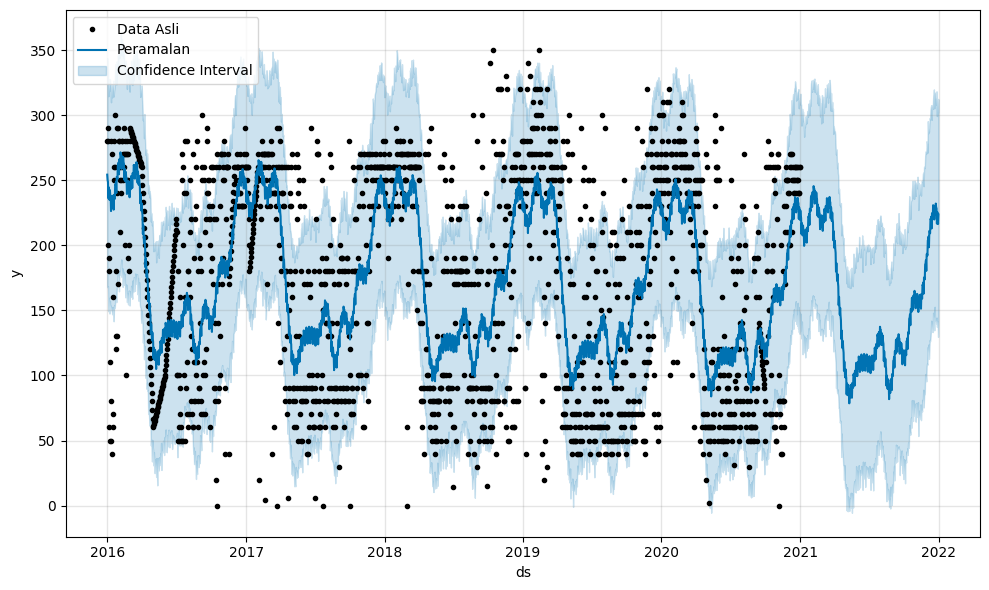

In [20]:
model_ddd.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [21]:
triple_metric(forecast, 'ddd_x')

Mean Absolute Error :  53.08291616163778
Mean Squared Error :  4340.307408843931
Mean Absolute Percentage Error :  0.3707663071180354


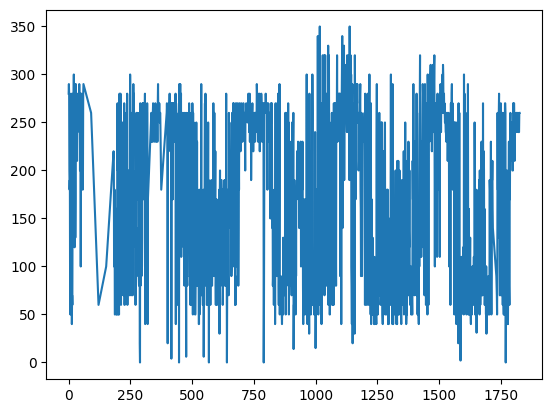

In [22]:
plt.plot(stasiun4['ddd_x'])

In [23]:
df_copy = stasiun4.copy()
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0


In [24]:
# Change the measure into radiant
df_copy['ddd_x'] = df_copy['ddd_x'].apply(lambda x: x * np.pi / 180)
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,4.886922,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,5.061455,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,4.886922,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,3.490659,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,3.141593,1.0


Text(0.5, 1.0, 'ddd_x after convert into radiant')

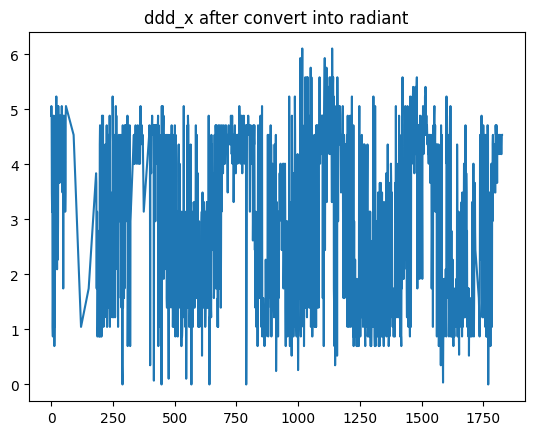

In [25]:
plt.plot(df_copy['ddd_x'])
plt.title('ddd_x after convert into radiant')

In [26]:
model_ddd_2 = get_model(df_copy, 'ddd_x')

C:\Users\thebl\AppData\Local\Temp\ipykernel_13980\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
01:19:13 - cmdstanpy - INFO - Chain [1] start processing
01:19:13 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future_dates = model_ddd_2.make_future_dataframe(periods=365, freq='D')
forecast = model_ddd_2.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


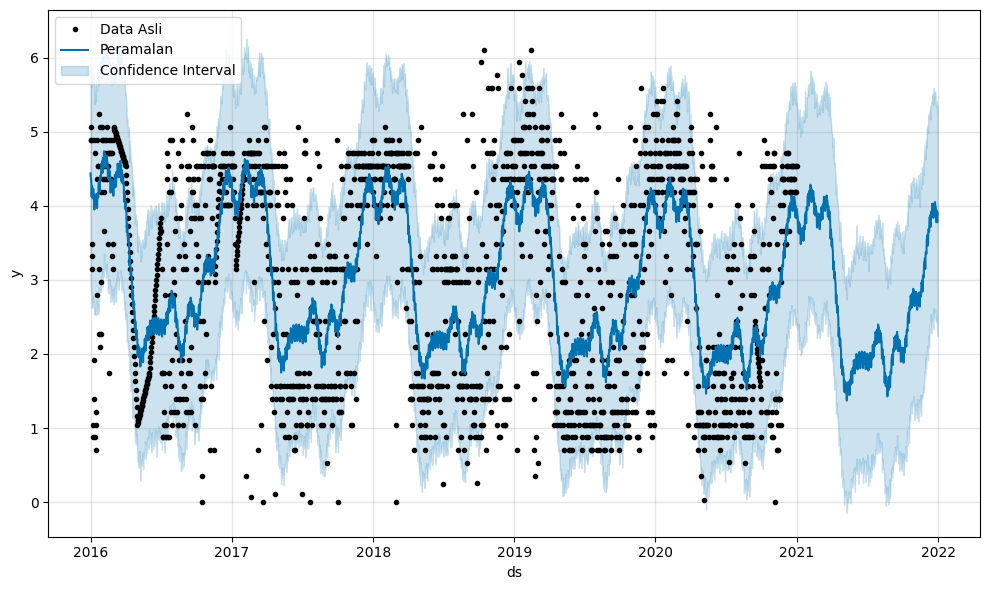

In [28]:
model_ddd_2.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [29]:
mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Squared Error : ',mse)
mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Percentage Error : ',mape)

Mean Absolute Error :  0.9264544083015103
Mean Squared Error :  1.3220923068163482
Mean Absolute Percentage Error :  0.37073456776048813


In [30]:
import random
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

params_grid = {
    'seasonality_mode': ('multiplicative', 'additive'),
    'changepoint_prior_scale': [0.1, 0.2, 0.3, 0.4, 0.5],
    'n_changepoints': [100, 150, 200]
}

grid = ParameterGrid(params_grid)

best_mape = float('inf')  # Inisialisasi nilai MAPE terbaik dengan nilai tak terhingga

for p in grid:
    print(p)
    random.seed(0)
    train_model = Prophet(
        changepoint_prior_scale=p['changepoint_prior_scale'],
        n_changepoints=p['n_changepoints'],
        seasonality_mode=p['seasonality_mode'],
        weekly_seasonality=True,
        daily_seasonality=True,
        yearly_seasonality=True,
        interval_width=0.95
    )
    
    future = stasiun4[['date', 'RR']].copy()
    future.columns = ['ds', 'y']
    train_model.fit(future)
    
    future_forecast = train_model.make_future_dataframe(periods=365)
    forecast = train_model.predict(future_forecast)
    
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun4['RR'][len(stasiun4)-365:])
    
    if mape < best_mape:
        best_mape = mape
        best_parameters = p

print("Best Parameters:", best_parameters)
print("Best MAPE:", best_mape)


{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


01:19:14 - cmdstanpy - INFO - Chain [1] start processing
01:19:14 - cmdstanpy - INFO - Chain [1] done processing
01:19:15 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


01:19:15 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


01:19:15 - cmdstanpy - INFO - Chain [1] start processing
01:19:15 - cmdstanpy - INFO - Chain [1] done processing
01:19:16 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


01:19:16 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


01:19:17 - cmdstanpy - INFO - Chain [1] start processing
01:19:17 - cmdstanpy - INFO - Chain [1] done processing
01:19:17 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


01:19:18 - cmdstanpy - INFO - Chain [1] done processing
01:19:18 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


01:19:21 - cmdstanpy - INFO - Chain [1] done processing
01:19:22 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


01:19:22 - cmdstanpy - INFO - Chain [1] done processing
01:19:22 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


01:19:26 - cmdstanpy - INFO - Chain [1] done processing
01:19:27 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


01:19:27 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


01:19:28 - cmdstanpy - INFO - Chain [1] start processing
01:19:32 - cmdstanpy - INFO - Chain [1] done processing
01:19:33 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


01:19:33 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


01:19:33 - cmdstanpy - INFO - Chain [1] start processing
01:19:37 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


01:19:37 - cmdstanpy - INFO - Chain [1] start processing
01:19:37 - cmdstanpy - INFO - Chain [1] done processing
01:19:38 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


01:19:42 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


01:19:42 - cmdstanpy - INFO - Chain [1] start processing
01:19:43 - cmdstanpy - INFO - Chain [1] done processing
01:19:43 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


01:19:47 - cmdstanpy - INFO - Chain [1] done processing
01:19:48 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


01:19:48 - cmdstanpy - INFO - Chain [1] done processing
01:19:49 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


01:19:51 - cmdstanpy - INFO - Chain [1] done processing
01:19:52 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


01:19:52 - cmdstanpy - INFO - Chain [1] done processing
01:19:53 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


01:19:56 - cmdstanpy - INFO - Chain [1] done processing
01:19:56 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


01:19:57 - cmdstanpy - INFO - Chain [1] done processing
01:19:57 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


01:20:01 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


01:20:02 - cmdstanpy - INFO - Chain [1] start processing
01:20:03 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


01:20:03 - cmdstanpy - INFO - Chain [1] start processing
01:20:05 - cmdstanpy - INFO - Chain [1] done processing
01:20:06 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


01:20:07 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


01:20:07 - cmdstanpy - INFO - Chain [1] start processing
01:20:10 - cmdstanpy - INFO - Chain [1] done processing
01:20:11 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


01:20:11 - cmdstanpy - INFO - Chain [1] done processing
01:20:12 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


01:20:17 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


01:20:18 - cmdstanpy - INFO - Chain [1] start processing
01:20:19 - cmdstanpy - INFO - Chain [1] done processing


Best Parameters: {'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Best MAPE: 1.2110255045279368


In [31]:
def get_model2(data, column):
    df_train = data[['date', column]]
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    my_model = Prophet(changepoint_prior_scale=0.2, 
                   n_changepoints=150, 
                   seasonality_mode='multiplicative')
    my_model.fit(df_train)
    
    return my_model

In [32]:
model_RR2 =  get_model2(stasiun4, 'RR')

C:\Users\thebl\AppData\Local\Temp\ipykernel_13980\4094008258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
01:20:20 - cmdstanpy - INFO - Chain [1] start processing
01:20:20 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future_dates = model_RR2.make_future_dataframe(periods=365, freq='D')
future_dates.shape[0]

2192

In [34]:
forecast = model_RR2.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,12.935743,-5.845259,30.217831
1,2016-01-02,12.945914,-5.776574,31.047866
2,2016-01-03,13.285354,-3.309192,31.797337
3,2016-01-04,13.156661,-4.554434,30.711098
4,2016-01-05,14.426878,-3.008013,32.451264


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


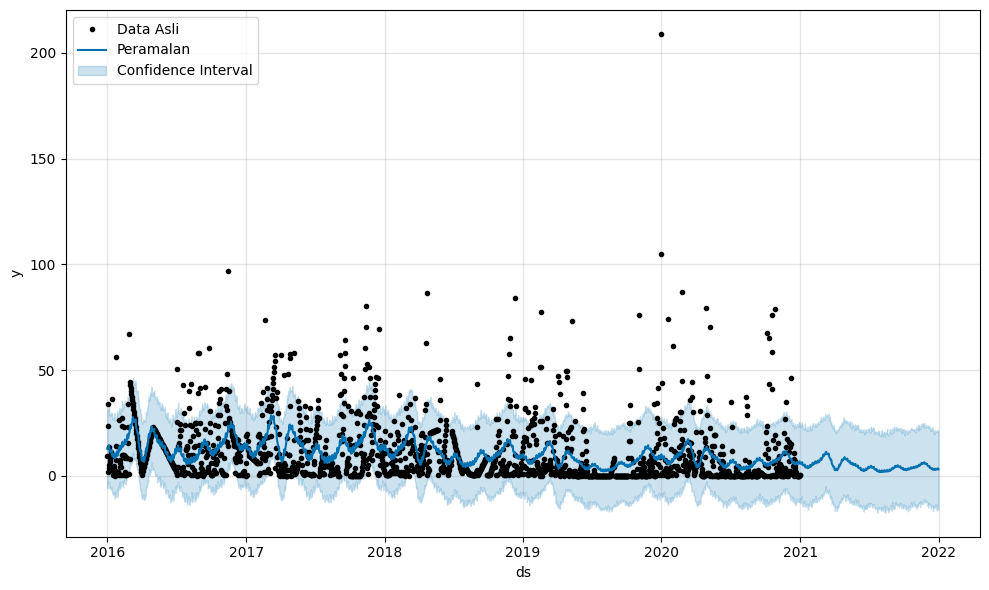

In [35]:
model_RR2.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [36]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun4[column][len(stasiun4)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun4[column][len(stasiun4)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun4[column][len(stasiun4)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [37]:
triple_metric(forecast, 'RR')

Mean Absolute Error :  8.79312538050173
Mean Squared Error :  202.4304149492095
Mean Absolute Percentage Error :  1.2114444201694337


In [38]:
predict_res_t = forecast['yhat'][len(forecast)-720:-355]

In [39]:
import pickle

# Buka file pickle
with open('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Code\\models\\Classification + Time Series\\best_classify.pkl', 'rb') as f:
    rf_model = pickle.load(f)